# PCA Analysis Notebook
This notebook performs Principal Component Analysis for dimensionality reduction and feature understanding.

Shape:  (297, 14)
 Optimal number of components: 12


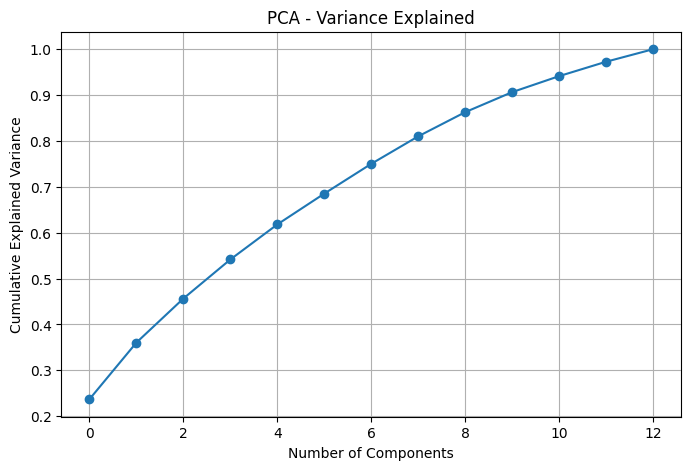

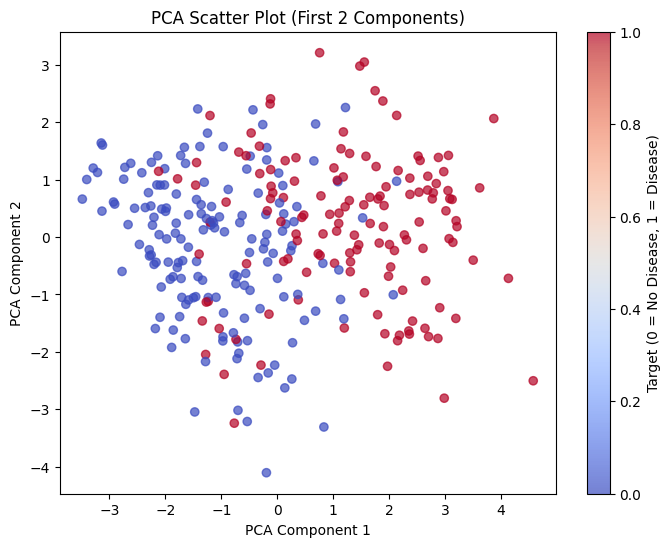

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,target
0,1.130664,-1.087655,3.164263,2.293052,0.023175,0.578814,0.664854,-0.536787,-1.495392,-0.499485,0.337585,0.479583,0
1,3.190926,-1.417885,-0.533715,-0.857970,-0.006289,0.745347,-0.259063,1.069777,0.342524,1.431509,-1.145257,-0.891418,1
2,3.124339,0.657008,-0.285134,-0.626641,0.152793,1.130179,-0.324995,0.209299,0.043205,0.462304,0.431665,0.863228,1
3,-0.484339,1.410972,0.397806,2.832741,0.721309,-0.388361,-0.522221,-2.153525,0.760079,0.228379,-1.545065,0.342960,0
4,-2.284542,-0.330033,-0.072260,1.209318,0.770835,0.625587,0.379567,0.014736,1.050381,0.628110,0.797211,-0.322946,0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1. Load cleaned binary dataset
# -----------------------------
df = pd.read_csv("../data/cleaned_heart_binary.csv")

print("Shape: ", df.shape)
df.head

# -----------------------------
# 2. Seperate features and target
# -----------------------------
X = df.drop("target", axis=1)
y = df["target"]

# -----------------------------
# 3. Scale features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4. Apply PCA
# -----------------------------
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_

# -----------------------------
# 5. Cummulative Variance Plot
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_var), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid(True)
plt.show

# Print how many components expoain 95% variance
n_components = np.argmax(np.cumsum(explained_var) >= 0.95) + 1
print(f" Optimal number of components: {n_components}")


# -----------------------------
# 6. Scatter Plot (First 2 PCA Components)
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Scatter Plot (First 2 Components)")
plt.colorbar(label="Target (0 = No Disease, 1 = Disease)")
plt.show()


# -----------------------------
# 7. Save PCA-transformed dataset
# -----------------------------
X_pca_optimal = X_pca[:, :n_components]

# Create DataFrame for PCA features
pca_columns = [f"PCA_{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(X_pca_optimal, columns=pca_columns)

# add target column back
df_pca["target"] = y.values
df_pca.to_csv("../data/heart_pca.csv", index=False)

display(df_pca.head())